<h1><Center>Holiday Air Travel Delays</center></h1>

## Business Understanding
---

#### Data Set Purpose -
This data set was provided by the U.S. Department of Transportation for all air travel in the United States during calendar year 2015. According to the Department of Transportation, this information was gathered, "...so that the public would have clear information about the nature and sources of airline delays and cancellations." With the addition of data regarding airport names, locations, etc. and a data set listing the codes and names of the airlines, which we used to provide human readable reports, we have loaded a total of 3 data sets, which will be combined to make easy to understand reports.

#### Outcomes Definition-
We have defined our initial outcome as an attempt to determine whether or not a flight is going to be on-time or not, as defined by the U.S. DOT at https://www.rita.dot.gov/bts/help/aviation/index.html, which states, **"How are flight delays calculated?
A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS). Arrival performance is based on arrival at the gate. Departure performance is based on departure from the gate.**" While a number of factors come into play in determining a flights on-time status, we believe an algorithm that can predict a simple on-time yes or no answer could potentially allow the public to make more informed decisions about whether or not to fly a particular airline, or depart from a particular airport. Since the original data set contains over 5.8 million records, we have decided to focus on travel during the months of November and December. These months represent about 17.3% of travel during the year, and this travel is also more variable due to weather and traffic concerns. 

#### Measurement of Effectiveness-
 Measurement of our prediction will be based on the accuracy of the algorithm. We anticipate an 80/20 test and train split, with 5 fold cross validation. Given the size of our data set at over 900,000 records, we feel this a 5 fold validation will be sufficient to give us a good solution. We will mainly grade our predictions on accuracy as calculated as: true positives + true negatives / true positives + true negatives + false positives + false negatives. 

Additionally, interesting insights could be gleaned from this prediction by correlating it to the time of day of the departure. For example, we could demonstrate the predicted number of on-time flights by time of day, airline and departure airport. In the interest of time, and for this assignment, we will focus on the data cleaning, representation of the basic statistics, some visualizations of the attributes of the data and end with some additional variables to be created from the data set to help in our analysis. 

## Data Meaning Type
***
The following table shows the attributes we used for analysis. For each attribute, we have provided the basic attribute features, including the name, a short description, the data type of the attribute, and the attribute type, e.g. Nominal, Ordinal, Interval or Ratio for numeric values and a notation if a non-numeric data type. Additional attribute discussion will follow the table. 

In [1]:
#load libraries
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,5)
import warnings
warnings.filterwarnings("ignore")

In [76]:
#create a dataframe from variable listing spreadsheet
df = pd.read_csv('DataKey3.csv')
df

,Attribute,Description,Atrtibute Data Type,Attribute Value
0,DAY_OF_WEEK,Day of the week (1-7,string,Non-Numeric
1,AIRLINE_CODE,Airline Identifier,string,Non-Numeric
2,ORIGIN_AIRPORT,Starting Airport,string,Non-Numeric
3,DESTINATION_AIRPORT,Destination Airport,string,Non-Numeric
4,SCHEDULED_DEPARTURE,Planned Departure Time,numeric,Interval
5,DEPARTURE_TIME,WHEEL_OFF - TAXI_OUT,numeric,Interval
6,DEPARTURE_DELAY,Total Delay on Depature,numeric,Ratio
7,TAXI_OUT,The time duration elapsed between departure fr...,numeric,Ratio
8,WHEELS_OFF,The time point that the aircraft's wheels leav...,numeric,Interval
9,SCHEDULED_TIME,Planned time amount needed for the flight trip,numeric,Ratio


Scale of our dataset is as follows:
 - Coordinates are geographic
 - All variables with IND are binary
 - All distance variables are measured in miles
 - All delays (continuous) are in minutes
 - All indicators (airport, airline, etc.) are simply acronyms
 - Dates are Date/Time

While most of the descriptions are self explanatory, some of the more important ones would benefit from additional discussion. 
 - Scheduled Departure is defined as the time scheduled by the airline in their Computerized Reservations System (CRS)
 - Departure time is the time the aircraft departs the gate, this is not actual wheels up time
 - Elapsed time is time from gate to gate, including taxi, ground hold, and actual flight time
 - Schedule Arrival is definted as the time scheduled by the airline in their Computerized Reservations System (CRS)
 - Arrival Time is the time the aircraft arrives at the gate, and is not actual wheels down time
 
***All Definitions are from the Bureau of Transportation Statistics*** see https://www.rita.dot.gov/bts/help/aviation/index.html for a complete discussion. We also developed 2 derived values, DEPARTURE_IND and DESTINATION_IND, which will be discussed in detail in the New Features section of this document. 

In regards to scale, we will cover this in both data quality and simple statistics.

## Data Quality
***
For this analysis, we have three data sets: airlines, airports, and flights. "Airlines" is a file containing airline codes (two letters) and the corresponding full name of the airline. "Airports" is a similar file; it details airport codes, corresponding names, as well as the associated latitude and longitude. To begin, we load our needed libraries and read the raw data. Raw data can be accessed at: https://www.kaggle.com/usdot/flight-delays/data.

In [2]:
##load in three data sets
#specify low_memory for flights data because wihtout this, pandas will attempt to guess data types. This is very computationally
#expensive

airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv',low_memory=False)

At the basic level of exploratory data analysis, we will now inspect the smaller data frames (airports and airlines) individually for missing values. We will address the missing values in the larger data set as we proceed through this analysis.  

In [4]:
#check for missing values in airlines
airlines.isnull().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

In [5]:
#check for missing values in airlines and airports
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

It appears that we have three missing observations in the aiports data set. Let's see where the problem is:

In [6]:
#take a look at the missing values
airports[airports['LATITUDE'].isnull()]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In a future step, we will combine the three data sets into one master data set. Because of this, the above three missing values would contribute to even more misisng values when the master data set is compiled. The three airports and their associated fill values are below as well as the source to find the latitude and longitude values.


ECP Latitude and Longitude found to be 30.3578 and -85.7938
PBG Latitude and Longitude found to be 44.6519 and -73.4657
UST Latitude and Longitude found to be 29.9544 and -81.3429

Used the following websites to validate latitude and longitude 
https://www.latlong.net/
https://www.gps-coordinates.org/


In [3]:
#fill in the three missing data values above
airports.loc[96:96, 'LATITUDE'] = 30.3578
airports.loc[234:234, 'LATITUDE'] = 44.6519
airports.loc[313:313, 'LATITUDE'] = 29.9544


airports.loc[96:96, 'LONGITUDE'] = -85.7938
airports.loc[234:234, 'LONGITUDE'] = -73.4657
airports.loc[313:313, 'LONGITUDE'] = -81.3429

Now, we will get an understanding of the size of this data set. We are dealing with a very large data set. We will proceed to merge the three into one master data set even though our main goal is to analyze delayed flights, both departure and arrival, during the holiday season. In a future exercise, we may use this master data set for additional analysis. 

In [8]:
#inspect the size of each data frame and print them out
airlines_dimensions = airlines.shape
airports_dimensions = airports.shape
flights_dimensions = flights.shape

print(airlines_dimensions)
print(airports_dimensions)
print(flights_dimensions)

(14, 2)
(322, 7)
(5819079, 31)


In this section, we complete the acutal merge of the three data sets into a master data set. Our unique identifier is the IATA code. Feature names were created to make this data set more intuitive. For example, notice that AIRPORT simply becomes either 'ORIGIN AIRPORT' or 'DESTINATION AIRPORT.' This was done for readers who do not travel frequenty and are not familar with the various airport codes. Likewise, we have done a similar exercise for airlines to rely less on abbreviations and acronyms. The result is a data frame, flights_merged_complete. 

A last step of this section makes use of the various date attributes to construct one feature of date, rather than spread them across several features. 

In [4]:
#join airline data with flights data to get an Airline Name
#source Python for Data Analysis, pg. 176-179
flights_merged_airlines = pd.merge(flights,airlines, left_on='AIRLINE', right_on='IATA_CODE',how='left')

#remove extra columns from merge
flights_merged_airlines.drop('IATA_CODE', axis = 1, inplace=True)

#rename airline_x and airline_y
flights_merged_airlines.rename(columns={'AIRLINE_x':'AIRLINE_CODE', 'AIRLINE_y':'AIRLINE'},inplace=True)

#join airport data with flights data to get departing airport Name
#source Python for Data Analysis, pg. 176-179
flights_merged_join_origin = pd.merge(flights_merged_airlines, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE',how='left')

#remove extra columns from merge
flights_merged_join_origin.drop('IATA_CODE', axis = 1, inplace=True)

#rename joined columns that indicate origin airport data
flights_merged_join_origin.rename(columns={'AIRPORT':'DEPARTING_AIRPORT_ NAME', 'CITY':'DEPARTING_CITY','STATE':'DEPARTING_STATE','COUNTRY':'DEPARTING_COUNTRY','LATITUDE':'DEPARTING_LATITUDE', 'LONGITUDE':'DEPARTING_LONGITUDE'},inplace=True)

#bring in desination airport data
flights_merged_complete = pd.merge(flights_merged_join_origin, airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE',how='left')

#rename joined data to reflect destination
flights_merged_complete.rename(columns={'AIRPORT':'DESTINATION_AIRPORT_NAME', 'CITY':'DESTINATION_CITY', 'STATE':'DESTINATION_STATE','COUNTRY':'DESTINATION_COUNTRY','LATITUDE':'DESTINATION_LATITUDE','LONGITUDE':'DESTINATION_LONGITUDE'},inplace=True)

#Date is spread across YEAR, MONTH, DAY, and DAY_OF_WEEK
#use pandas to clean this up
flights_merged_complete['DATE'] = pd.to_datetime(flights_merged_complete[['YEAR','MONTH', 'DAY']])

#remove extra columns from merge
flights_merged_complete.drop('IATA_CODE', axis = 1, inplace=True)


In order to focus our analysis, we will only consider flights in the busy holiday season (November and December). We are interested to understand how different airlines compare on some key metrics such as delay and size of delay. The dimensions are also checked to verify the significant size of this data frame for findings and reporting. 

In [5]:
#We are interested in analyzing the delays during the busiest time for airlines. Therefore, we will filter our data frame
#to include values only from November and December 2015.
flights_merged_novdec = flights_merged_complete.loc[flights_merged_complete['MONTH'] >= 11]

In [11]:
#Let's inspect the data frame shape to get a better understanding of this data set. 
flights_merged_novdec.shape

(947202, 45)

<span style="color:blue; font-size:1.25em;"> Missing Data Review and Imputation</span>

In this vast data set, there are likely missing values to consider. The below report gives us an overall 'health report' of our data set. The below report breaks out the features, the number of missing values, and the percent complete of that feature. Because of the complexity of this data set, there will be more than one round to ensure the data quality is significant. 



In [12]:
#missing data report first pass
#https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial
missing = flights_merged_novdec.isnull().sum(axis=0).reset_index()
missing.columns = ['feature name', 'missing values']
missing['percent complete (%)'] = (flights_merged_novdec.shape[0]-missing['missing values'])/flights_merged_novdec.shape[0]*100
missing.sort_values('percent complete (%)').reset_index(drop = True)

,feature name,missing values,percent complete (%)
0,CANCELLATION_REASON,934540,1.336779
1,AIRLINE_DELAY,779859,17.667087
2,AIR_SYSTEM_DELAY,779859,17.667087
3,LATE_AIRCRAFT_DELAY,779859,17.667087
4,WEATHER_DELAY,779859,17.667087
5,SECURITY_DELAY,779859,17.667087
6,AIR_TIME,15118,98.403931
7,ELAPSED_TIME,15118,98.403931
8,ARRIVAL_DELAY,15118,98.403931
9,WHEELS_ON,13270,98.599032


We see that there are a large number of missing values in the CANCELLATION_REASON feature. This is simply because CANCELLATION_REASON is nominal data type. Any flights that do not have a value for this feature, were not cancelled. This also tells us that cancellations make up a very small percent of our data set (1.34%). We can also see that all of the features associated with delay also have a significant number of missing values. A missing values means the flight was not delayed or could nto be categorigzed. Finally, we see that there are a few other data issues in AIR_TIME, ELAPSED_TIME, ARRIVAL_DELAY, WHEELS_ON, TAXI_IN, ARRIVAL_TIME, TAXI_OUT, WHEELS_OFF, DEPARTURE_TIME, DEPARTURE DELAY, and TAIL_NUMBER. These features, however, contain less than 3% of missing values. As such, we will focus on the features with a percent complete less than 20% and revisit once those attributes have cleaned. 

The first action in cleaning this data set is to populate the various delay reason columns with 0's where missing values are present. This was the best course of action to maintain the original meaning of the variables and still have a clean data set for analysis. 0 is not a valid code for these delays, so we will maintain those instances that contain a legitimate reason code. After this step, we will revisit the missing values report.



In [6]:
#given that we have high missing values in delay columns, we will fill all NaN with 0
#per data dictionary, these are all string types
delay_values = {'CANCELLATION_REASON': 0, 'WEATHER_DELAY': 0, 'LATE_AIRCRAFT_DELAY': 0, 'AIRLINE_DELAY': 0,
               'SECURITY_DELAY':0, 'AIR_SYSTEM_DELAY':0}

flights_novdec = flights_merged_novdec.fillna(value=delay_values)

In [14]:
#missing data report round2
#https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial
missing_round_2 = flights_novdec.isnull().sum(axis=0).reset_index()
missing_round_2.columns = ['feature name', 'missing values']
missing_round_2['percent complete (%)'] = (flights_novdec.shape[0]-missing_round_2['missing values'])/flights_novdec.shape[0]*100
missing_round_2.sort_values('percent complete (%)').reset_index(drop = True)

,feature name,missing values,percent complete (%)
0,ARRIVAL_DELAY,15118,98.403931
1,AIR_TIME,15118,98.403931
2,ELAPSED_TIME,15118,98.403931
3,ARRIVAL_TIME,13270,98.599032
4,TAXI_IN,13270,98.599032
5,WHEELS_ON,13270,98.599032
6,TAXI_OUT,12485,98.681907
7,WHEELS_OFF,12485,98.681907
8,DEPARTURE_TIME,12018,98.731210
9,DEPARTURE_DELAY,12018,98.731210


After cleaning the delay columns, we see that the minimum percent complete for this data set is 98.40%. It is important to note that we do see missing values in key attributes of our analysis: specifically, departure time and delay. An inspection of the data reveals that in absence of a departure time, the flight was cancelled. We want to focus our analysis on flights that were completed, meaning we will remove all cancelled flights and keep those that were completed. Also complicating the data health report is small number of diverted flights. Diverted flights do not have values for many of our features of interest such (ARRIVAL_DELAY for example). Diverted flights, much like cancelled flights, distract from our analysis. We will remove all diverted flights as well. 

We will subset our data frame on the CANCELLATION attribute (1 = CANCELLATION) and DIVERTED attribute (1= DIVERTED) and revisit our missing data report. 

In [7]:
#remove all cancelled flights as we are focusing on recorded delays, both arrival and departure
remove_cancelled = flights_novdec.loc[flights_novdec['CANCELLED'] != 1]

In [16]:
#Verify shape of data frame
remove_cancelled.shape

(934540, 45)

In [8]:
#remove all diverted flights as we are focusing on flights with recorded delays, both arrival and departure
completed_novdec = remove_cancelled.loc[remove_cancelled['DIVERTED'] != 1]

In [18]:
#verify shape of data frame
completed_novdec.shape

(932084, 45)

The data quality of our exploratory data analysis can be confirmed by the final missing data report below. 

In [19]:
#missing data report final
#https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial
missing_round_3 = completed_novdec.isnull().sum(axis=0).reset_index()
missing_round_3.columns = ['feature name', 'missing values']
missing_round_3['percent complete (%)'] = (completed_novdec.shape[0]-missing_round_3['missing values'])/completed_novdec.shape[0]*100
missing_round_3.sort_values('percent complete (%)').reset_index(drop = True)

,feature name,missing values,percent complete (%)
0,YEAR,0,100.0
1,CANCELLED,0,100.0
2,CANCELLATION_REASON,0,100.0
3,AIR_SYSTEM_DELAY,0,100.0
4,SECURITY_DELAY,0,100.0
5,AIRLINE_DELAY,0,100.0
6,LATE_AIRCRAFT_DELAY,0,100.0
7,WEATHER_DELAY,0,100.0
8,AIRLINE,0,100.0
9,DEPARTING_AIRPORT_ NAME,0,100.0


The following code will create 2 new variables to indicate if a flight was delayed on departure or arrival:

In [9]:
completed_novdec['DEPARTURE_IND']= completed_novdec.DEPARTURE_DELAY # create new column, populate w/data
completed_novdec.DEPARTURE_IND[completed_novdec.DEPARTURE_IND < 15] = 0 # early or less than 15 minutes late = ontime
completed_novdec.DEPARTURE_IND[completed_novdec.DEPARTURE_IND >= 15] = 1 # more than 15 minutes late = delayed
completed_novdec['ARRIVAL_IND']= completed_novdec.ARRIVAL_DELAY # create new column, populate w/data
completed_novdec.ARRIVAL_IND[completed_novdec.ARRIVAL_IND < 15] = 0 # early or less than 15 minutes late = ontime
completed_novdec.ARRIVAL_IND[completed_novdec.ARRIVAL_IND >= 15] = 1 # more than 15 minutes late = delayed

Now that we have a complete data set, we will complete an inspection of outliers of our delay variables. We see some extreme values below. In regards to the right-skewed outliers, we conclude that while 1,638 minutes is an extreme delay, because we are focusing on the busiest travel time of the year and are looking the country as an aggregate, this extreme outlier will stay in our data set. Likewise, on the outliers less than 0, it is conceivable that a flight could leave 80 minutes early from a small airport. Give this extreme, we will keep for now. The reason we are keeping these values is, while they may be extreme, represent some circumstances of extreme delay or early arrival that is probable to reflect reality in a hectic travel season.

In regards to our other variables, we will address more distributions in the simple statistics section. 

In [29]:
#inspect outliers on departure delay
completed_novdec['DEPARTURE_DELAY'].describe(percentiles=[.10,.30,.65,.75,.80,.95])

count    932084.000000
mean          9.305697
std          38.556871
min         -82.000000
10%          -7.000000
30%          -4.000000
50%          -2.000000
65%           1.000000
75%           7.000000
80%          12.000000
95%          65.000000
max        1649.000000
Name: DEPARTURE_DELAY, dtype: float64

In [28]:
#inspect outliers on arrival delay
completed_novdec['ARRIVAL_DELAY'].describe(percentiles=[.10,.30,.65,.75, .80,.95])

count    932084.000000
mean          3.616526
std          40.962531
min         -80.000000
10%         -22.000000
30%         -12.000000
50%          -6.000000
65%           1.000000
75%           7.000000
80%          12.000000
95%          64.000000
max        1638.000000
Name: ARRIVAL_DELAY, dtype: float64

## SIMPLE STATISTICS 
***

For ease of analysis and to create more specific attributes, we computed regions for the 48 contingous states along with Alaska, Hawaii, Puerto Rico, Guam, and Virgin Islands. The first step computes regions by Destination and the second step computes regions by Departure.

In [30]:
# COMPUTE DESTINATION REGION VARIABLE
completed_novdec['DESTINATION_REGION']= ''

def f(row):
    if row['DESTINATION_STATE'] in ('CA','OR','WA'):
        val = 'West'
    elif row['DESTINATION_STATE'] in ('MT','ID','WY','CO','UT','NV'):
        val = 'Rocky'
    elif row['DESTINATION_STATE'] in ('AZ','NM','TX','OK'):
        val = 'Southwest'
    elif row['DESTINATION_STATE'] in ('ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH'):
        val = 'Midwest'
    elif row['DESTINATION_STATE'] in ('PA','NY','ME','VT','MA','CT','NJ','NH','RI'):
        val = 'Northeast'
    elif row['DESTINATION_STATE'] in ('AK','HI','PR','VI','GU'):
        val = 'Non_48'
    else:
        val = 'Southeast'
    return val

completed_novdec['DESTINATION_REGION'] = completed_novdec.apply(f, axis=1)

In [31]:
# COMPUTE DEPARTING REGION VARIABLE
completed_novdec['DEPARTING_REGION']= ''

def f(row):
    if row['DEPARTING_STATE'] in ('CA','OR','WA'):
        val = 'West'
    elif row['DEPARTING_STATE'] in ('MT','ID','WY','CO','UT','NV'):
        val = 'Rocky'
    elif row['DEPARTING_STATE'] in ('AZ','NM','TX','OK'):
        val = 'Southwest'
    elif row['DEPARTING_STATE'] in ('ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH'):
        val = 'Midwest'
    elif row['DEPARTING_STATE'] in ('PA','NY','ME','VT','MA','CT','NJ','NH','RI'):
        val = 'Northeast'
    elif row['DEPARTING_STATE'] in ('AK','HI','PR','VI','GU'):
        val = 'Non_48'
    else:
        val = 'Southeast'
    return val

completed_novdec['DEPARTING_REGION'] = completed_novdec.apply(f, axis=1)

In [49]:
# GENERATE SIMPLE STATISTICS
airline_stats = completed_novdec[['DISTANCE','SCHEDULED_TIME','ELAPSED_TIME','ARRIVAL_TIME','DEPARTING_REGION',
'DESTINATION_REGION','AIRLINE','DEPARTING_CITY','DEPARTING_STATE','DESTINATION_STATE','DEPARTURE_DELAY','ARRIVAL_DELAY']]
airline_stats.describe()

,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
count,932084.000000,932084.000000,932084.000000,932084.000000,932084.000000,932084.000000
mean,831.321100,143.993914,138.304743,1473.283053,9.305697,3.616526
std,608.680844,76.031851,74.688281,529.330031,38.556871,40.962531
min,31.000000,21.000000,14.000000,1.000000,-82.000000,-80.000000
25%,377.000000,87.000000,83.000000,1057.000000,-5.000000,-14.000000
50%,666.000000,125.000000,120.000000,1512.000000,-2.000000,-6.000000
75%,1072.000000,176.000000,170.000000,1914.000000,7.000000,7.000000
max,4983.000000,705.000000,730.000000,2400.000000,1649.000000,1638.000000


In [54]:
# GENERATE NEW OBJECT TO INCLUDE IND VARS
airline= completed_novdec[['DISTANCE','SCHEDULED_TIME','ELAPSED_TIME','ARRIVAL_TIME','DEPARTING_REGION',
'DESTINATION_REGION','AIRLINE','DEPARTING_CITY','DEPARTING_STATE','DESTINATION_STATE','DEPARTURE_DELAY',
'ARRIVAL_DELAY','DEPARTURE_IND', 'ARRIVAL_IND']]

Above are simple statistics (mean, std, min, etc.) for the numerical variables of interest from the sample flights data. The mean distance travelled for flights is roughly 832 miles, with a scheduled flight time of 144 minutes and an elapsed flight time of 138 minutes. We see on average the elapsed flight time is ~6 minutes less than the scheduled flight time. The standard deviation for distance is quite large (609 miles), but considering the size of the United States along with the flights from the non-contiguous states and territories, this variance makes sense logically.

Lastly, the departure and arrival indicators represent the percentage of late departures and late arrivals for all flights - roughly 18% of the sampled flights had a late departure and late arrival. These two numbers are closely related and correlated, as we will discuss more in depth below. 

<span style="color:blue; font-size:1.25em;">  Initial Feature Selection / Correlation </span>

In [55]:
# IMPORT MATPLOT AND NUMPY FOR VISUALIZATION
%matplotlib inline

In [26]:
# GENERATE PEARSON R STATISTIC FOR NUMERICAL DATA
airline_scatter = completed_novdec[['DISTANCE','SCHEDULED_TIME','ELAPSED_TIME','ARRIVAL_TIME','DEPARTURE_DELAY',
'ARRIVAL_DELAY']]
airline_scatter.corr(method='pearson')

,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,0.979929,0.969254,0.016749,0.025241,-0.027847
SCHEDULED_TIME,0.979929,1.000000,0.985236,0.016523,0.025952,-0.035292
ELAPSED_TIME,0.969254,0.985236,1.000000,0.017721,0.030205,0.023035
ARRIVAL_TIME,0.016749,0.016523,0.017721,1.000000,0.036321,0.035830
DEPARTURE_DELAY,0.025241,0.025952,0.030205,0.036321,1.000000,0.948176
ARRIVAL_DELAY,-0.027847,-0.035292,0.023035,0.035830,0.948176,1.000000


As expected, distance is highly correlated to the scheduled and elapsed flight times, with Pearson R statistics of 0.98 and 0.97 respectively. The late departure and late arrival times show strong correlation as well, with a Pearson R statistic of 0.95. The remaining variables in the correlation matrix showed little to weak correlation. 

Text(0.5,1,'Scattterplot Matrix')

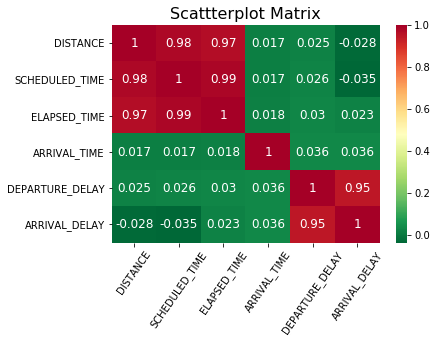

In [27]:
# GENERATE CORRELATION MATRIX PLOT

#CALCUALTE CORRELATION COEFFICIENTS TO SEPARATE DATAFRAME
correlation = airline_scatter.corr()

# DEFINE COLUMN LABELS
labels = ['DISTANCE','SCHEDULED_TIME','ELAPSED_TIME','ARRIVAL_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY']

#DEFINE X LABELS
ax = plt.axes()
xticks = labels

#POPULATE CELL VALUES AND CREATE HEAPMAP
sns.heatmap(correlation, cmap='RdYlGn_r',annot=True,ax=ax,xticklabels=xticks, annot_kws={"size": 12})
plt.xticks(rotation=55) 
ax.set_title('Scattterplot Matrix',size=16)

#Works consulted: https://seaborn.pydata.org/

Here we begin to see our initial business objective, to provide a binary delayed/not delayed indicator may be in trouble. These aggregated data show there is a problem with predictive power in this dataset. Without additional granular information from other sources to help us determine what __events are correlated with__ delays, we don't have enough predictive power to achieve our goal. The Pearson's R values are low, except for a few variables, where multicollinearity could be a problem, we will check for this later in the EDA process. These statistics give us our first statistical look at the data and allow us perform a sanity check and to begin to understand our data set. These are meaningful to us because they give us a opportunity to identify what might considered an unusual finding for a particular data point or projection. 

## Visualize Attributes
***

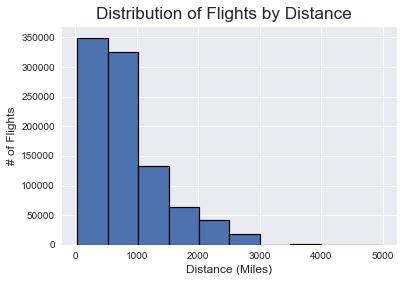

In [39]:
# DISTRIBUTION OF FLIGHTS BY DISTANCE
plt.suptitle('Distribution of Flights by Distance', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel("Distance (Miles)", fontsize=12)  
plt.ylabel("# of Flights", fontsize=12)
airline['DISTANCE'].hist(edgecolor='black', linewidth=1.2)

 The distribution of the flights by distance is right skewed, with about 72% of the flights having a distance of <= 1,000 miles. Roughly 15% of the flights were between 1,000 and 1,500 miles, with the remaining flights being longer than 1,500. The distribution of flights by distance will help us understand the skewness present and its effect on modeling. 

To reduce the dimensionality of the data, we computed flight distance buckets broken into 500 mile increments. Further, we will compute the percentage of late departures by departing state and percentage of late arrivals by destination state. This visual is appropriate because we are looking for an understanding of the distribution of miles and the overall number of flights.

In [56]:
# SEGMENT DISTANCE INTO BINS
airline['DISTANCE_BINS'] = pd.cut(airline.DISTANCE,[0,501,1001,1501,2001,2501,3001,5000],7,
labels=['0-500','501-1000','1001-1500','1501-2000','2001-2500','2501-3000','>3000'])

In [2]:
# PREP DEPARTING AND DESTINATION STATE DATAFRAMES FOR CHOROPLETH GRAP - CALCUALTE MEAN
# GROUP BY DEPARTING STATE FOR ONE GRAPH AND DESTINATION STATE FOR THE SECOND
state_depart = airline[['DEPARTING_STATE','DEPARTURE_IND']]
state_dest = airline[['DESTINATION_STATE','ARRIVAL_IND']]

state_depart_stats = state_depart.groupby(['DEPARTING_STATE'], as_index=False).mean()
state_dest_stats = state_dest.groupby(['DESTINATION_STATE'], as_index=False).mean()
state_dest_stats 

NameError: name 'airline' is not defined

<span style="color:blue; font-size:1.25em;">  Late Departures by State </span>

Here, we are demonstrating the code used to generate the visuals on Plotly. If you are able to install plotly, these graphics are interactive and show the values for each state. To insure compatibility, we have a static graphic showing the results.

In [62]:
# INSTALL PLOTLY VIA COMMAND PROMPT CREDENTIALS 
# cd C:\Users\bkolovich\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.7
# pip install plotly
# NEED TO REGISTER ON PLOT.LY TO GENDERATE USERNAME AND PASSWORD

username='ohiotate82'
password="o7MoO74QR5XqSNb9EMee"

import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='ohiotate82', api_key="o7MoO74QR5XqSNb9EMee")

### Note on replicating this plotly graph: please ensure plotly is installed on your machine. This can be installed via Conda. The user credentials are above and should be included to completely replicate. This will apply to both maps.

In [1]:
# START PROGRAM FOR CHOROPLETH GRAPH -LATE DEPARTURES BY DEPARTURE STATE

for col in state_depart.columns:
    state_depart_stats[col] = state_depart_stats[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


state_depart_stats['text'] = state_depart_stats['DEPARTING_STATE']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_depart_stats['DEPARTING_STATE'],
        z = state_depart_stats['DEPARTURE_IND'].astype(float),
        locationmode = 'USA-states',
        text = state_depart_stats['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percentage")
        ) ]

layout = dict(
        title = 'Percentage of Late Departures by Departing State<br>(Hover or Breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )


NameError: name 'state_depart' is not defined

The highest percentage of late departures by state of departure occurred in Colorado, Nevada, California, New Jersey, Maryland, Illinois, and New Mexico. 

In [64]:
# START PROGRAM FOR CHOROPLETH GRAPH -LATE ARRIVALS BY DESTINATION STATE

for col in state_dest.columns:
    state_dest_stats[col] = state_dest_stats[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

state_dest_stats['text'] = state_dest_stats['DESTINATION_STATE']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_dest_stats['DESTINATION_STATE'],
        z = state_dest_stats['ARRIVAL_IND'].astype(float),
        locationmode = 'USA-states',
        text = state_dest_stats['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Percentage")
        ) ]

layout = dict(
        title = 'Percentage of Late Arrivals by Destination State<br>(Hover or Breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

As opposed to the late departure map, the percentage of late arrivals by destination state are more homogenous across the nation. New Jersey, California, New Mexico, Oklahoma, and Maine all had more than 20% late arrivals into their state. We chose to include two maps in this section because we are dealing with geographic data.

<span style="color:blue; font-size:1.25em;"> Late Arrivals and Departures by Flight Distance</span>

Percentage of Late Arrivals by Distance
DISTANCE_BINS
0-500        17.366747
501-1000     18.032485
1001-1500    19.287882
1501-2000    18.177604
2001-2500    17.286322
2501-3000    17.769239
>3000        15.424837
Name: ARRIVAL_IND, dtype: float64


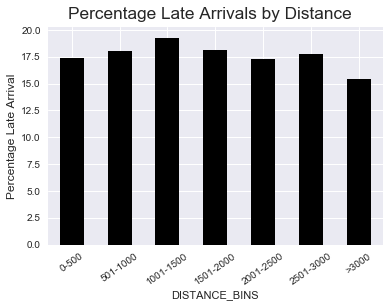

In [57]:
# PERCENTAGE OF LATE ARRIVALS BY DISTANCE BIN
distance_arrival_ind = airline.groupby(by=['DISTANCE_BINS'])
print ('Percentage of Late Arrivals by Distance')
distance_arrival_ind2= (distance_arrival_ind.ARRIVAL_IND.sum() / distance_arrival_ind.ARRIVAL_IND.count() *100)
print (distance_arrival_ind.ARRIVAL_IND.sum() / distance_arrival_ind.ARRIVAL_IND.count() *100)

# PLOT PERCENTAGE OF LATE ARRIVALS BY DISTANCE
plt.suptitle('Percentage Late Arrivals by Distance', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.ylabel("Percentage Late Arrival", fontsize=12)
distance_arrival_ind2.plot(kind='bar',color='black',rot=35)

The highest percentage of late arrivals ocurred in flights that were between 1,001-1,500 miles. The other buckets were fairly similar while the >3,000 flights had the lowest percentage of late arrivals. One could surmise that the >3,000 flights have lower consumer traffic and are logistically eaiser to maintain than the more frequent, shorter flights. This information is important because it indicates that distance bins may prove to be a useful covariate in predictive modeling efforts. This type of visualization is appropriate because by binning distances we can get a better understanding of late arrivals.

Percentage of Late Departures by Distance
DISTANCE_BINS
0-500        16.494043
501-1000     18.019297
1001-1500    19.975112
1501-2000    19.562421
2001-2500    18.288146
2501-3000    17.368304
>3000        19.934641
Name: DEPARTURE_IND, dtype: float64


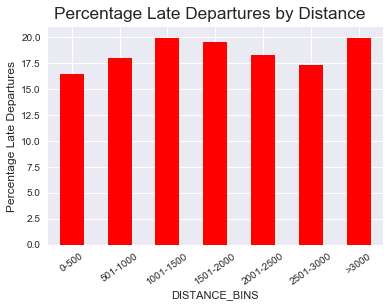

In [58]:
# PERCENTAGE OF LATE DEPARTURES BY DISTANCE BIN
distance_departure_ind = airline.groupby(by=['DISTANCE_BINS'])
print ('Percentage of Late Departures by Distance')
distance_departure_ind2= (distance_departure_ind.DEPARTURE_IND.sum() / distance_arrival_ind.DEPARTURE_IND.count() *100)
print (distance_departure_ind.DEPARTURE_IND.sum() / distance_arrival_ind.DEPARTURE_IND.count() *100)

# PLOT PERCENTAGE OF LATE DEPARTURES BY DISTANCE
plt.suptitle('Percentage Late Departures by Distance', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.ylabel("Percentage Late Departures", fontsize=12)
distance_departure_ind2.plot(kind='bar',color='red',rot=35)

The highest percentage of late departures by distance ocurred in flights that were between 1,001-1,500 and >3,000 miles. The lowest percentage of late departures by distance ocurred in the shortest flight distance, 0-500 miles. This information is important because it indicates that distance bins may prove to be a useful covariate in predictive modeling efforts. This type of visualization is appropriate because by binning distances, we can also get a better idea of late departures. The idea is to present an ANOVA type of visual. As stated, these bins could be useful covariates in modeling.

<span style="color:blue; font-size:1.25em;">  Late Arrivals and Departures by Airline </span>

Percentage of Late Departures by Airline
AIRLINE
Alaska Airlines Inc.            11.230971
American Airlines Inc.          15.738479
American Eagle Airlines Inc.    14.068287
Atlantic Southeast Airlines     16.602041
Delta Air Lines Inc.            13.903360
Frontier Airlines Inc.          23.113597
Hawaiian Airlines Inc.           4.687373
JetBlue Airways                 23.368873
Skywest Airlines Inc.           17.712017
Southwest Airlines Co.          21.516534
Spirit Air Lines                24.109536
United Air Lines Inc.           20.915202
Virgin America                  21.433195
Name: DEPARTURE_IND, dtype: float64


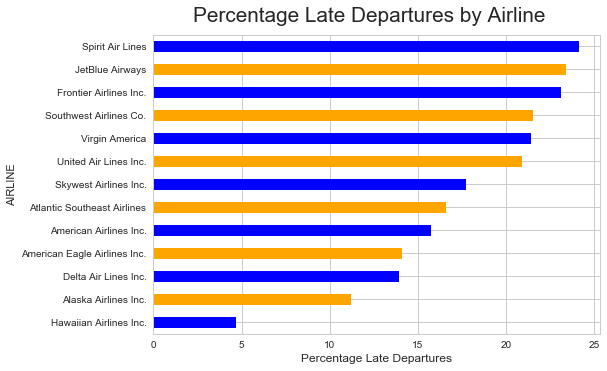

In [77]:
# PERCENTAGE OF LATE DEPARTURES BY AIRLINE
airline_departure_ind = airline.groupby(by=['AIRLINE'])
print ('Percentage of Late Departures by Airline')
airline_departure_ind2= (airline_departure_ind.DEPARTURE_IND.sum() / airline_departure_ind.DEPARTURE_IND.count() *100)
print (airline_departure_ind.DEPARTURE_IND.sum() / airline_departure_ind.DEPARTURE_IND.count() *100)
airline_departure_ind2.sort()

# PLOT PERCENTAGE OF LATE DEPARTURES BY AIRLINE
plt.suptitle('Percentage Late Departures by Airline', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel("Percentage Late Departures", fontsize=12)
airline_departure_ind2.plot(kind='barh',color=['blue','orange'])

The airline with the highest percentage of late departures was Spirt Air Lines, followed closely by Jetblue Airways and Frontier Airlines Inc. The lowest percentage of late departures were the two outside of the contingous 48 states - Hawaiian Airlines Inc. and Alaska Airlines Inc. This information is important because it indicates that airline may prove to be a useful covariate in predictive modeling efforts. This type of visual is appropriate because we want to understand and explain how delays vary by airline.

Percentage of Late Arrivals by Airline
AIRLINE
Alaska Airlines Inc.            13.952663
American Airlines Inc.          17.354430
American Eagle Airlines Inc.    15.029679
Atlantic Southeast Airlines     18.509884
Delta Air Lines Inc.            13.190710
Frontier Airlines Inc.          24.785455
Hawaiian Airlines Inc.           6.423738
JetBlue Airways                 23.172176
Skywest Airlines Inc.           20.987053
Southwest Airlines Co.          19.154326
Spirit Air Lines                26.964869
United Air Lines Inc.           17.848803
Virgin America                  21.849283
Name: ARRIVAL_IND, dtype: float64


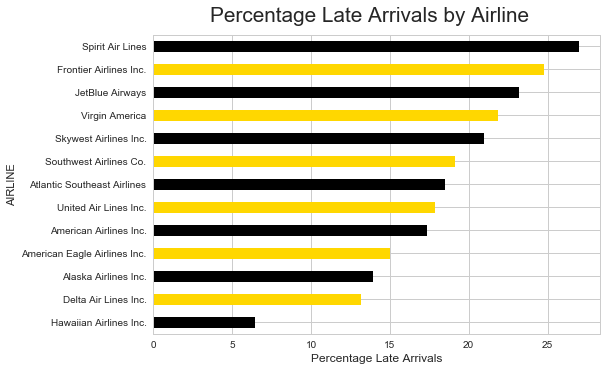

In [79]:
# PERCENTAGE OF LATE ARRIVALS BY AIRLINE
airline_arrival_ind = airline.groupby(by=['AIRLINE'])
print ('Percentage of Late Arrivals by Airline')
airline_arrival_ind2= (airline_arrival_ind.ARRIVAL_IND.sum() / airline_arrival_ind.ARRIVAL_IND.count() *100)
print (airline_arrival_ind.ARRIVAL_IND.sum() / airline_arrival_ind.ARRIVAL_IND.count() *100)
airline_arrival_ind2.sort()

# PLOT PERCENTAGE OF LATE ARRIVALS BY AIRLINE
plt.suptitle('Percentage Late Arrivals by Airline', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel("Percentage Late Arrivals", fontsize=12)
airline_arrival_ind2.plot(kind='barh',color=['black','gold'])

The percentage of late arrivals by airline is similar to the percentage of late departures by airlin, with the highest percentage stemming from Spirt Air Lines, followed by Frontier Airlines Inc. and Jetblue Airways. The lowest percentage of late departures were from Hawaiian Airlines Inc. and Delta Air lines Inc. This information is important because it indicates that airline may prove to be a useful covariate in predictive modeling efforts. This type of visual is useful because, again, we want to compare airlines on the percent of late arrivals. 

<span style="color:blue; font-size:1.25em;"> Late Arrivals and Departures by Region </span>

Percentage of Late Departures by DEPARTING REGION
DEPARTING_REGION
Midwest      16.962758
Non_48       10.560140
Northeast    17.812566
Rocky        19.867005
Southeast    16.996591
Southwest    18.917020
West         19.691247
Name: DEPARTURE_IND, dtype: float64


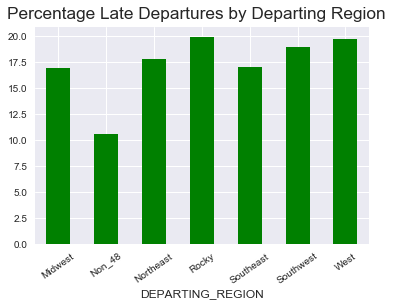

In [61]:
# PERCENTAGE OF LATE DEPARTURES BY DEPARTING_REGION
DEPARTING_REGION_IND = airline.groupby(by=['DEPARTING_REGION'])
print ('Percentage of Late Departures by DEPARTING REGION')
DEPARTING_REGION_IND2 = (DEPARTING_REGION_IND.DEPARTURE_IND.sum() / DEPARTING_REGION_IND.DEPARTURE_IND.count() *100)
print (DEPARTING_REGION_IND.DEPARTURE_IND.sum() / DEPARTING_REGION_IND.DEPARTURE_IND.count() *100)

# PLOT PERCENTAGE OF LATE DEPARTURES BY DEPARTING REGION
plt.suptitle('Percentage Late Departures by Departing Region', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel("Percentage Late Departures", fontsize=12)
DEPARTING_REGION_IND2.plot(kind='bar',color=['green'],rot=35)

The highest percentage of late departures ocurred in the Rocky Mountain and West Regions. As observed in the airline analysis, the lowest percentage ocurred in the non-48 regions -Alaska, Hawaii, PR, etc. In the abscence of weather data, we can approximate by taking a look at delays by region. We do see that late flights vary somewhat by region. This type of visualization is important because we created new categorical variables (departing region) and want to understand how those levels vary by late departures. 

Percentage of Late Arrivals by Destination Region
DESTINATION_REGION
Midwest      16.094120
Non_48       13.501203
Northeast    19.695656
Rocky        19.022508
Southeast    16.991262
Southwest    17.866906
West         20.797762
Name: ARRIVAL_IND, dtype: float64


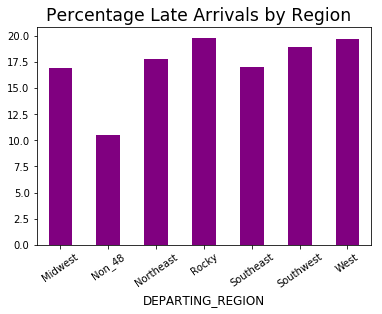

In [36]:
# FIND THE PERCENTAGE OF LATE ARRIVALS BY DESTINATION_REGION
DESTINATION_REGION_IND = airline.groupby(by=['DESTINATION_REGION'])
print ('Percentage of Late Arrivals by Destination Region')
DESTINATION_REGION_IND2= (DESTINATION_REGION_IND.ARRIVAL_IND.sum() / DESTINATION_REGION_IND.ARRIVAL_IND.count() *100)
print (DESTINATION_REGION_IND.ARRIVAL_IND.sum() / DESTINATION_REGION_IND.ARRIVAL_IND.count() *100)

# PLOT PERCENTAGE OF LATE ARRIVALS BY REGION
plt.suptitle('Percentage Late Arrivals by Region', x=0.5, y=0.95, ha='center', fontsize='xx-large')
plt.xlabel("Percentage Late Arrivals", fontsize=12)
DEPARTING_REGION_IND2.plot(kind='bar',color=['purple'],rot=35)

Similar to the late departures analysis, the highest percentage of late arrivals ocurred in the Rocky Mountain and West Regions, with the lowest percentage ocurring in the non-48 regions (Alaska, Hawaii, PR, etc.). In the abscence of weather data, we can approximate by taking a look at delays by region. We do see that late flights vary somewhat by region. This type of visualization is important because we created new categorical variables (departing region) and want to understand how those levels vary by arrival delays. 

<span style="color:blue; font-size:1.25em;"> Flight Distance by Region </span>

Text(0,0.5,'Miles')

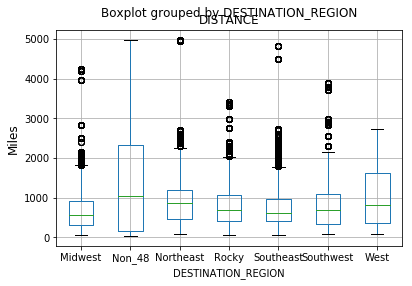

In [37]:
# BOXPLOT OF MILES BY DESTINATION REGION
ax = airline.boxplot(column='DISTANCE', by='DESTINATION_REGION') 
plt.ylabel("Miles", fontsize=12)

As expcted, the boxplot shows a wide distribution of flight distance for the non-48 destination region. The Midwest and Southeast regions are closely distributed while the West region has a fairly wide deviation. The desination region indicates considerable variation. As such, we can expect the skewness to have an impact on our modeling efforts. This boxplot is appropriate because we want to know not just the arrival/departure delays by region, but also understand how the variation in miles by each region. 

## Explore Joint Attributes 
***

In [65]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

#preset dimensions
a4_dims = (11.7, 8.27)

#renaming dataframes and adding a dataframe of only departure delayed flights
df = completed_novdec
df2= df[df['DEPARTURE_IND'] == 1]

#A dataframe of only arrival delayed flights
df3= df[df['ARRIVAL_IND'] == 1]

#A dataframe of flights with either arrival or departure delay
df4 = df.query('ARRIVAL_IND == 1 | DEPARTURE_IND == 1')

We will begin by visualizing the relationships between the following continuous variables:

-  DISTANCE
-  DEPARTURE_DELAY
-  ARRIVAL_DELAY
-  AIR_TIME
-  AIR_SYSTEM_DELAY
-  SECURITY_DELAY
-  AIRLINE_DELAY
-  LATE_AIRCRAFT_DELAY
-  WEATHER_DELAY



In [39]:
# GENERATE PEARSON R STATISTIC FOR CONTINUOUS VARIABLES
airline_scatter2 = df[['DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_TIME','AIR_SYSTEM_DELAY',
'SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']]
airline_scatter2.corr(method='pearson')

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
DISTANCE,1.000000,0.025241,-0.027847,0.980113,0.011304,0.006325,0.012433,-0.010851,-0.003928
DEPARTURE_DELAY,0.025241,1.000000,0.948176,0.023441,0.311801,0.033618,0.655276,0.650425,0.283400
ARRIVAL_DELAY,-0.027847,0.948176,1.000000,-0.010184,0.416319,0.033617,0.625231,0.621888,0.285077
AIR_TIME,0.980113,0.023441,-0.010184,1.000000,0.034800,0.006722,0.013076,-0.011531,-0.001759
AIR_SYSTEM_DELAY,0.011304,0.311801,0.416319,0.034800,1.000000,0.004047,0.027066,0.048117,0.046442
SECURITY_DELAY,0.006325,0.033618,0.033617,0.006722,0.004047,1.000000,-0.001481,0.003954,-0.000866
AIRLINE_DELAY,0.012433,0.655276,0.625231,0.013076,0.027066,-0.001481,1.000000,0.066289,-0.005312
LATE_AIRCRAFT_DELAY,-0.010851,0.650425,0.621888,-0.011531,0.048117,0.003954,0.066289,1.000000,0.030045
WEATHER_DELAY,-0.003928,0.283400,0.285077,-0.001759,0.046442,-0.000866,-0.005312,0.030045,1.000000


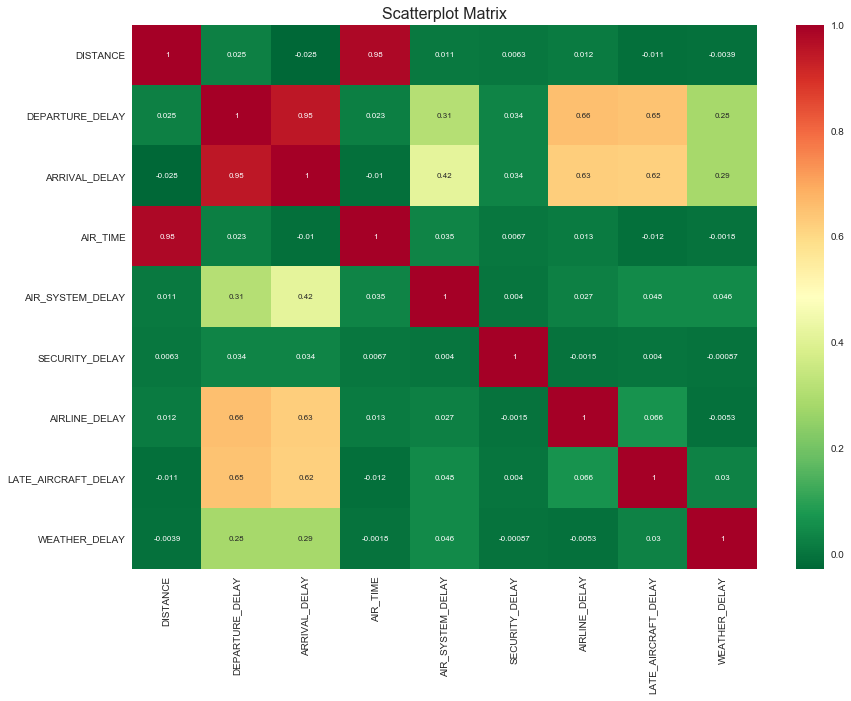

In [40]:
# GENERATE CORRELATION MATRIX PLOT
import seaborn as sns
%matplotlib inline

#CALCUALTE CORRELATION COEFFICIENTS TO SEPARATE DATAFRAME
correlation2 = airline_scatter2.corr()

# DEFINE COLUMN LABELS
labels = ['DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_TIME','AIR_SYSTEM_DELAY',
'SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

#DEFINE X LABELS
xticks = labels

#POPULATE CELL VALUES AND CREATE HEAPMAP
a4_dims = (14, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(correlation2, cmap='RdYlGn_r',annot=True,ax=ax,xticklabels=xticks, annot_kws={"size": 8})
plt.xticks(rotation=90) 
ax.set_title('Scatterplot Matrix',size=16)
plt.show()

Here we focused on the delay reasons along with our predictive outputs. This comparison, as opposed to our reivew earlier shows some potential for predictive ability. Our heatmap indicates that the strongest correlations are between air time vs distance and departure delay vs arrival delay. We can also see that out of all the delay factors, airline and late aircraft delays have the highest correlation to arrival and departure delays. The correlation between air time and distance can be easily explained as the longer a flight has to travel, the longer it should take. With that in mind, we will focus our attention on the following variables:

-  DEPARTURE_DELAY
-  ARRIVAL_DELAY
-  AIRLINE_DELAY
-  LATE_AIRCRAFT_DELAY

<span style="color:blue; font-size:1.25em;"> Scatterplot Departure vs Arrival Delay  </span>

In order to focus on the effects of airline and late aircraft delays, we will be using a subset of our original dataset that only includes flights with such delays. 

Comparing our four scatterplots below, we see that there is an apparent correlation between airline and late aircraft delays vs departure and arrival delays. There is not much difference the arrival and departure delay plots. This is because arrival and departure delay are strongly correlated with each other. We will dive more into this in the next section.

One interesting thing to note is that there is a cluster of data points in the airline delay vs departure delay where the airline delay is greater than departure delay. However, this cluster is not apparent in the airline vs arrival delay plot. This discrepency describes the rare occasion where a flight departs on time but still arrives delayed. Since AIRLINE_DELAY is loosely defined as 'Delay caused by the airline', it's hard to pinpoint the exact reason for delay. 

Text(-1.575,0.5,'Airline Delay in Minutes')

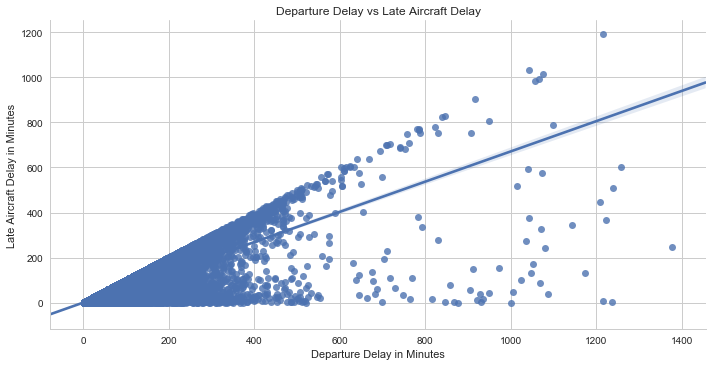

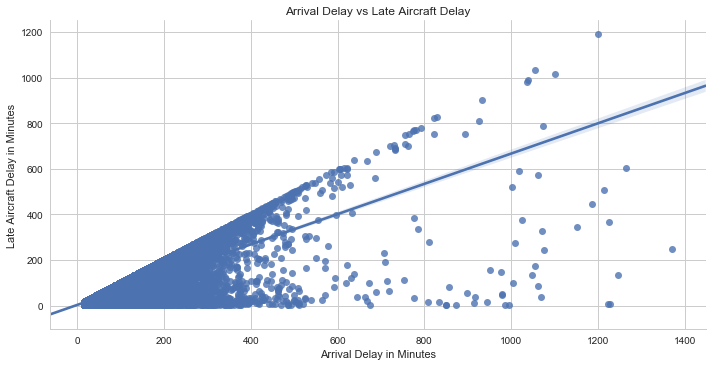

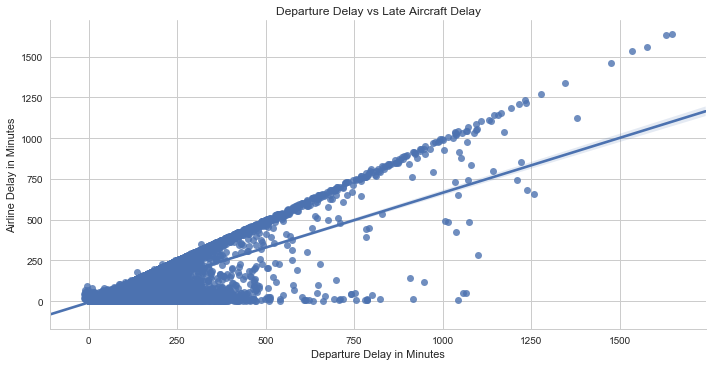

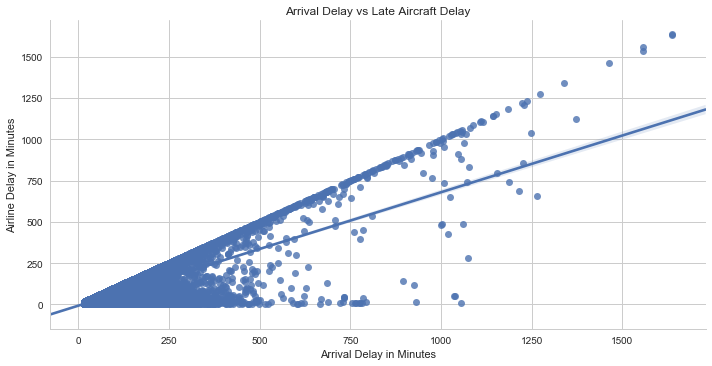

In [41]:
#A dataframe of flights with late aircraft delay
df5= df[df['LATE_AIRCRAFT_DELAY'] != 0]
df6= df[df['AIRLINE_DELAY'] != 0]

#Departure Delay vs Late Aircraft Delay
plot = sns.lmplot('DEPARTURE_DELAY', # Horizontal axis
           'LATE_AIRCRAFT_DELAY', # Vertical axis
           data=df5, # Data source
           fit_reg=True, # Fix a regression line
           size = 5,
           aspect =2,) # size and dimension

plt.title('Departure Delay vs Late Aircraft Delay')
# Set x-axis label
plt.xlabel('Departure Delay in Minutes')
# Set y-axis label
plt.ylabel('Late Aircraft Delay in Minutes')


#Arrival Delay vs Late Aircraft Delay
plot = sns.lmplot('ARRIVAL_DELAY', # Horizontal axis
           'LATE_AIRCRAFT_DELAY', # Vertical axis
           data=df5, # Data source
           fit_reg=True, # Fix a regression line
           size = 5,
           aspect =2,) # size and dimension

plt.title('Arrival Delay vs Late Aircraft Delay')
# Set x-axis label
plt.xlabel('Arrival Delay in Minutes')
# Set y-axis label
plt.ylabel('Late Aircraft Delay in Minutes')


#Departure Delay vs Airline Delay
plot = sns.lmplot('DEPARTURE_DELAY', # Horizontal axis
           'AIRLINE_DELAY', # Vertical axis
           data=df6, # Data source
           fit_reg=True, # Fix a regression line
           size = 5,
           aspect =2,) # size and dimension

plt.title('Departure Delay vs Late Aircraft Delay')
# Set x-axis label
plt.xlabel('Departure Delay in Minutes')
# Set y-axis label
plt.ylabel('Airline Delay in Minutes')


#Arrival Delay vs Airline Delay
plot = sns.lmplot('ARRIVAL_DELAY', # Horizontal axis
           'AIRLINE_DELAY', # Vertical axis
           data=df6, # Data source
           fit_reg=True, # Fix a regression line
           size = 5,
           aspect =2,) # size and dimension

plt.title('Arrival Delay vs Late Aircraft Delay')
# Set x-axis label
plt.xlabel('Arrival Delay in Minutes')
# Set y-axis label
plt.ylabel('Airline Delay in Minutes')


Observing our scatterplot below of arrival delays vs departure delays, we see that there is a very strong correlation between the two. In fact, the slope of the regression is close to a 45 degree angle. This indicates that for every minute in departure delay, we can expect an additional minute in arrival delay. This behavior is logical, as a flight that takes off later should arrive later as well. Note that we are only focusing on flights that had either an arrival or departure delay. 

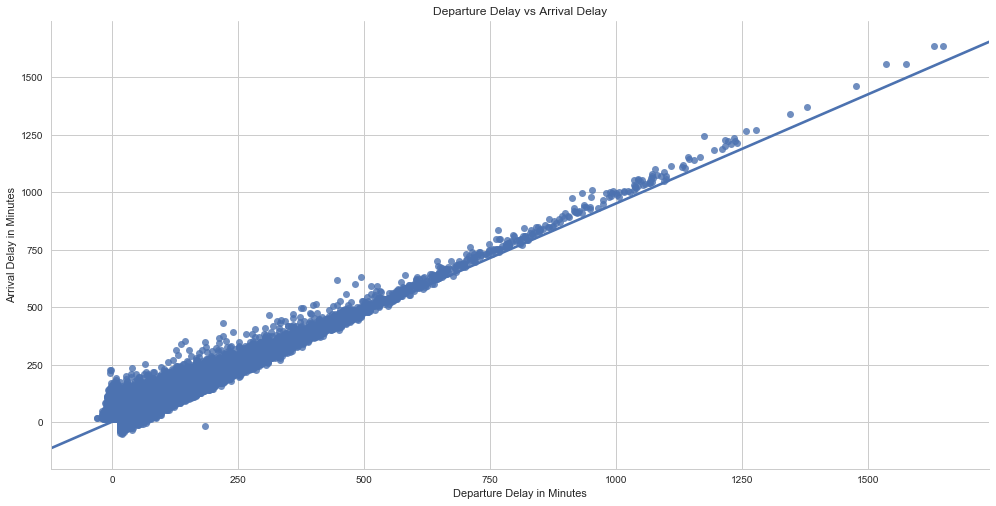

In [66]:
#Departure vs Arrival Delay
ax = sns.lmplot('DEPARTURE_DELAY', # Horizontal axis
           'ARRIVAL_DELAY', # Vertical axis
           data=df4, # Data source
           fit_reg=True, # Fix a regression line
           size = 7,
           aspect =2 ) # size and dimension
 
plt.title('Departure Delay vs Arrival Delay')
# Set x-axis label
plt.xlabel('Departure Delay in Minutes')
# Set y-axis label
plt.ylabel('Arrival Delay in Minutes')

## Explore Attributes and Class
***

<span style="color:blue; font-size:1.5em;"> Delays by Day of the Week  </span>

Similar to our analysis of the arrival and departure delays of different airlines, we will repeat the procedure according to the day of the week. The barplots below show departure and arrival delays based on the day of the week.  Again, we generated a barplot for the number of delays and one for the percentage of delays. While there are a couple of outliers here and there, we can see that the percentage of delayed vs not delayed flights is marginally affected by the day of the week. We see that the highest volume of flights and delays occur on Tuesdays, while Fridays seems to be the lowest in terms of volume. Percentage wise, Tuesday is highest and Thursday is the lowest. From these charts, we can infer that flight delays are insignificantly affected by the different days of the week. As expected, departure delays again nearly identical to arrival delays.

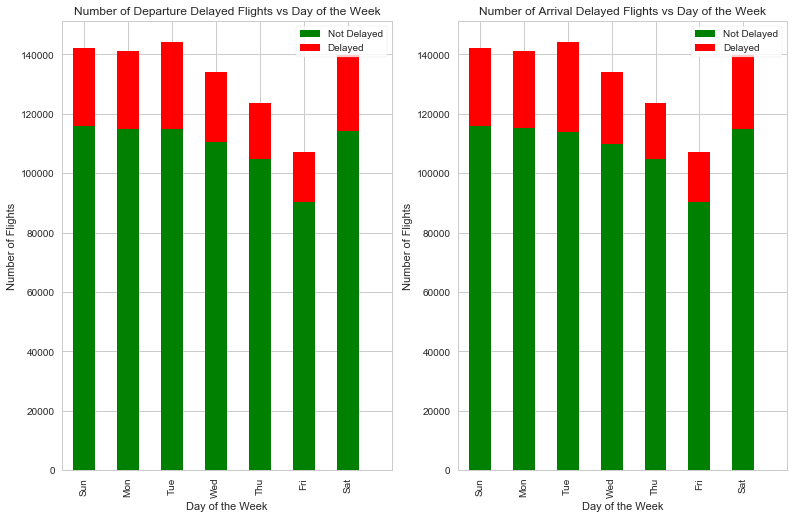

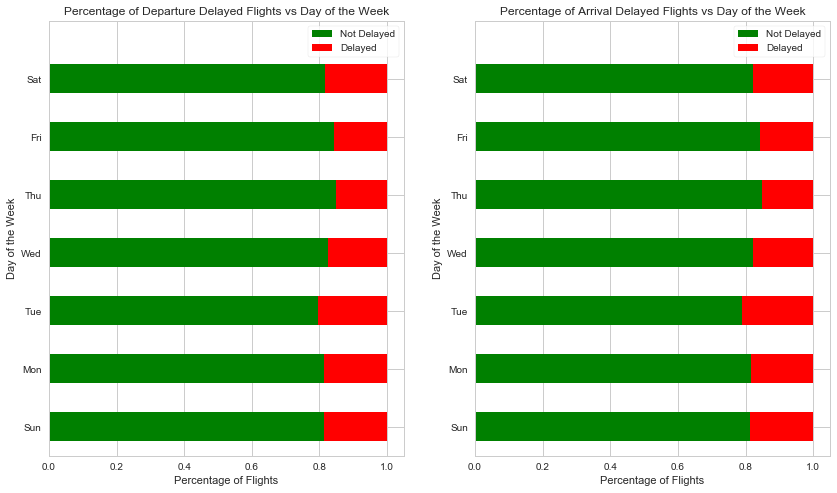

In [67]:
fig,axs=plt.subplots(1,2)
fig.set_size_inches(13,8.27)

#barplot of number of departure delay per day of the week
airline_delay3 = pd.crosstab([df['DAY_OF_WEEK']], df.DEPARTURE_IND)
ax1=airline_delay3.plot(ax=axs[0],kind='bar', stacked=True, color=['green','red'],title ='Number of Departure Delayed Flights vs Day of the Week')
ax1.set_xticks([0,1,2,3,4,5,6,7])
ax1.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
ax1.set_xlabel("Day of the Week")
ax1.set_ylabel("Number of Flights")
ax1.legend(["Not Delayed","Delayed"],frameon=True)

#barplot of number of arrival delay per day of the week
airline_delay4 = pd.crosstab([df['DAY_OF_WEEK']], df.ARRIVAL_IND)
ax1=airline_delay4.plot(ax=axs[1],kind='bar', stacked=True, color=['green','red'],title ='Number of Arrival Delayed Flights vs Day of the Week')
ax1.set_xticks([0,1,2,3,4,5,6,7])
ax1.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
ax1.set_xlabel("Day of the Week")
ax1.set_ylabel("Number of Flights")
ax1.legend(["Not Delayed","Delayed"],frameon=True)

fig,axs = plt.subplots(1,2)
fig.set_size_inches(14, 8)

#barplot of percentage of departure delay per day of the week
airline_delay_percent = airline_delay3.div(airline_delay3.sum(1).astype(float),axis=0)
ax2=airline_delay_percent.plot(ax=axs[0],kind='barh', stacked=True, color=['green','red'],title ='Percentage of Departure Delayed Flights vs Day of the Week')
ax2.set_yticks([0,1,2,3,4,5,6,7])
ax2.set_yticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
ax2.set_xlabel("Percentage of Flights")
ax2.set_ylabel("Day of the Week")
ax2.legend(["Not Delayed","Delayed"],frameon=True)

#barplot of percentage of arrival delay per day of the week
airline_delay_percent = airline_delay4.div(airline_delay4.sum(1).astype(float),axis=0)
ax2=airline_delay_percent.plot(ax=axs[1],kind='barh', stacked=True, color=['green','red'],title ='Percentage of Arrival Delayed Flights vs Day of the Week')
ax2.set_yticks([0,1,2,3,4,5,6,7])
ax2.set_yticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
ax2.set_xlabel("Percentage of Flights")
ax2.set_ylabel("Day of the Week")
ax2.legend(["Not Delayed","Delayed"],frameon=True)



Although we established that there is weak correlation between flight delays and the day of the week, it may be interesting to investigate the length of the delays. With the scatterplots and violinplots below, we see that this is not the case. The distribution of delay duration throughout the week for both arrivals and departures are very similar. 

Moving forward, we will consider the day of the week a non-factor in determining whether a flight will be delayed or not.

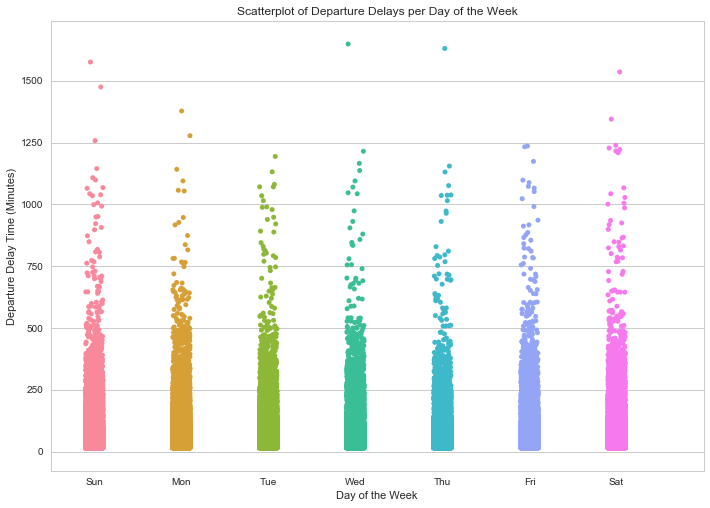

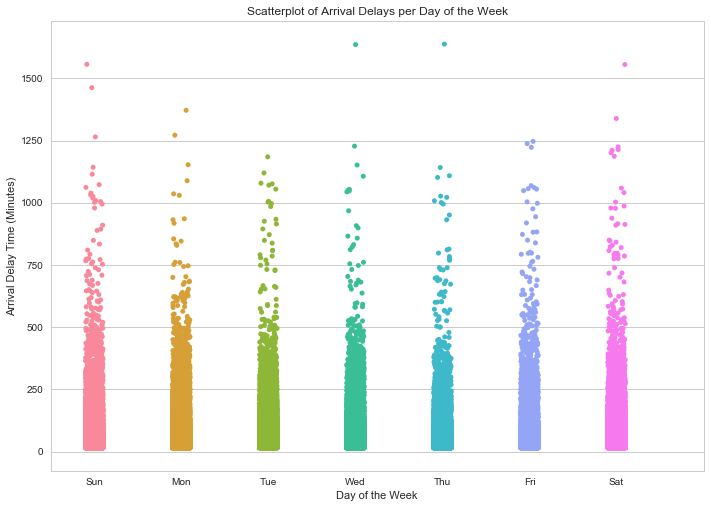

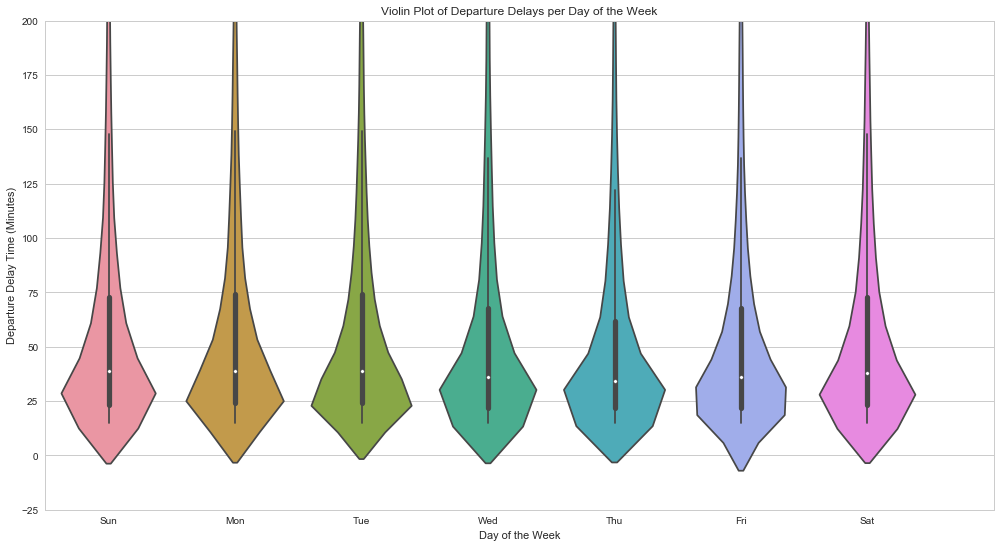

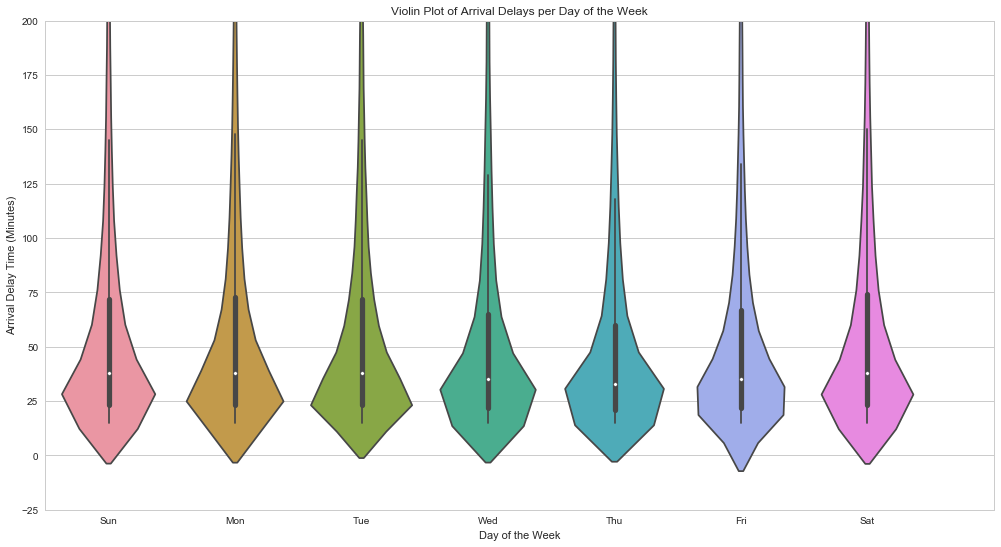

In [68]:
#Scatterplot of departure delay per day of week
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(ax=ax, x="DAY_OF_WEEK", y="DEPARTURE_DELAY", data=df2, jitter=True);
ax.set(xlabel='Day of the Week', ylabel='Departure Delay Time (Minutes)')
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.title('Scatterplot of Departure Delays per Day of the Week')
plt.show()

#Scatterplot of arrival delay per day of week
fig, ax = plt.subplots(figsize=a4_dims)
sns.stripplot(ax=ax, x="DAY_OF_WEEK", y="ARRIVAL_DELAY", data=df3, jitter=True);
ax.set(xlabel='Day of the Week', ylabel='Arrival Delay Time (Minutes)')
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.title('Scatterplot of Arrival Delays per Day of the Week')
plt.show()


#Violinplot of departure delay per day of week
a4_dims = (17, 9)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.violinplot(ax=ax, x="DAY_OF_WEEK", y="DEPARTURE_DELAY", data=df2);
plt.ylim(-25,200)
ax.set(xlabel='Day of the Week', ylabel='Departure Delay Time (Minutes)')
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.title('Violin Plot of Departure Delays per Day of the Week')
plt.show()

#Violinplot of arrival delay per day of week
a4_dims = (17, 9)
fig, ax = plt.subplots(figsize=a4_dims)
fig = sns.violinplot(ax=ax, x="DAY_OF_WEEK", y="ARRIVAL_DELAY", data=df3);
plt.ylim(-25,200)
ax.set(xlabel='Day of the Week', ylabel='Arrival Delay Time (Minutes)')
ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
plt.title('Violin Plot of Arrival Delays per Day of the Week')
plt.show()

## New Features
***
While we have created some new features in this data set, such as indicator variables for departure and arrival delays and regions, we feel our predictive power could increase by a weather component. For example, having a simple percent chance of precipitation is hypthosized to lead us to a better predictive model. 

A complete list of new features:
 - Distance Buckets
 - Indicator variables for departure and arrival delays
 - Regions

Additionally, subsets used for visualizations are specified to look at late arrivals and departures. 

## Exceptional Work
***


Next, we will extract the continuous features of our data set and apply principal components analaysis in order to reduce the dimensionality of our data set. To begin, we extract the continuous features and scale them use the StandardScaler in Scikit-learn. We need to standardize the features because they are measured on different scales. 

Works Consulted: "Python Machine Learning" by Sebastian Raschka & Vahid Mirjalili, 2nd ed. Packt Publishing

In [10]:
#extract the continuous features for principal components
X = completed_novdec.filter(['WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','DEPARTURE_DELAY',
                            'SCHEDULED_DEPARTURE'], axis = 1)
#Standardize the features
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

Next, we utilize Scikit-Learn to define a PCA class and specify all six components.

In [11]:
#Import PCA and specify two principal components
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components = 6)
Y_sklearn = sklearn_pca.fit_transform(X_std)
#display the eigenvectors
Y_sklearn

array([[  1.27698232e+00,  -3.71986225e+00,   3.97705579e-01,
         -1.24969520e-02,  -2.18353505e-01,   3.47781897e-02],
       [  2.66150487e+00,  -3.60115862e+00,   4.31327720e-01,
         -3.97692240e-03,  -3.47199031e-01,   2.82170825e-02],
       [  4.22319966e+00,  -3.56763407e+00,   3.11102215e-02,
         -5.54376069e-02,  -1.91737165e-01,   2.00406338e-01],
       ..., 
       [  2.06058794e+00,  -3.77532609e-01,  -5.99996345e-01,
          3.34966318e+00,   3.37697406e-01,   5.96622261e-02],
       [  7.54619450e-01,  -4.44145319e-01,  -4.87501974e-01,
          3.38582820e+00,   2.17294519e-01,  -1.40943863e-02],
       [  1.87770454e+00,  -2.57597613e-01,   1.47170792e-02,
          3.36153456e+00,   2.33695730e-01,   2.72782887e-02]])

We now calculate the variance explained by the principal components using Scikit Learn's explained_variance_ratio attribute.

In [12]:
#calculate the variance explained by each principal component
variance_explained= sklearn_pca.explained_variance_ratio_

#calculate the cumulative variance explained
cumulative_variance=np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=4)*100)
print(cumulative_variance)

[ 49.42  81.95  98.2   99.34  99.87 100.  ]


We see from the cumulative variance calculation that the first two principal components explain 81.95% of the variance. Since we are interested in reducing the dimensionality in our data set, we are able to explain a significant portion of the variance with just two principal components. Additionally, the cumulative variance plot below also reminds us that with three principal components, we can explain almost 99% of the variance in our features. We are seeking to employ principal components analysis to potentially serve as an input to a future project delay classification algorithm.

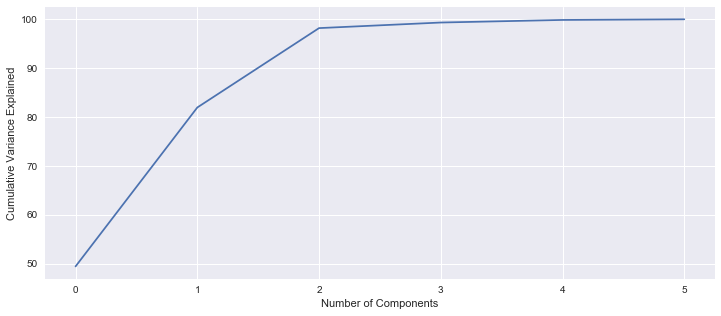

In [13]:
#plot the cumulative variance explained by the principal components
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

As an additional step for visualization, we decided to explore two new libraries: geopandas and geoplot. we hypothesize that location is a significant variable in predicting delays. We begin by loading the needed libraries. Users interested in replicating the graphs should visit the below Github repo. Conda users should use the command below when installing. 

Works consulted: http://geopandas.org/, https://github.com/ResidentMario/geoplot

In [14]:
#install libraries found here https://residentmario.github.io/geoplot/installing.html
#conda users: conda install geoplot -c conda-forge
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

To begin, we will only concern ourselves with the reportable airlines defined the DOT (https://www.rita.dot.gov/bts/help/aviation/index.htmlO) as seen below in the filter list.

When creating a map visual, we create a new feature called geometry, which takes our latitude and longitude features and converts them to a point. To illustrate the outpoint, see the geometry.head command.


In [15]:
#evaluate the reportable airlines
filter_list = ['FL', 'AS', 'AA', 'MQ', 'DL', 'EV', 'F9', 'HA', 'B6', 'OO', 'WN', 'UA', 'US', 'VX']
FILTER = completed_novdec[completed_novdec.AIRLINE_CODE.isin(filter_list)]

In [16]:
#create geometry
from shapely.geometry import Point
geometry = FILTER.apply(
    lambda FILTER: Point(float(FILTER['DESTINATION_LONGITUDE']), 
                                          float(FILTER['DESTINATION_LATITUDE'])), 
    axis='columns'
)
geometry.head()

4871878      POINT (-87.90446 41.9796)
4871879     POINT (-80.29056 25.79325)
4871880      POINT (-87.90446 41.9796)
4871882    POINT (-122.30931 47.44898)
4871884     POINT (-73.77893 40.63975)
dtype: object

Now that we have a dataframe with a geometry feature, we can join our filtered data frame to the geometry object. We also load in a shape file of the United States. The shape file can be downloaded at https://github.com/ResidentMario/geoplot. Users replicating this should store the shape file in their current working directory. After we load the shape file, we create the map and define the features. We scale our map by arrival delays (size of the circles) and define the hue (color) on arrival delay count. 

In [17]:
#Arrival Delays
arrivals = gpd.GeoDataFrame(FILTER, geometry=geometry)

#read in shape file of United States
contiguous_usa = gpd.read_file('contiguous.geojson')

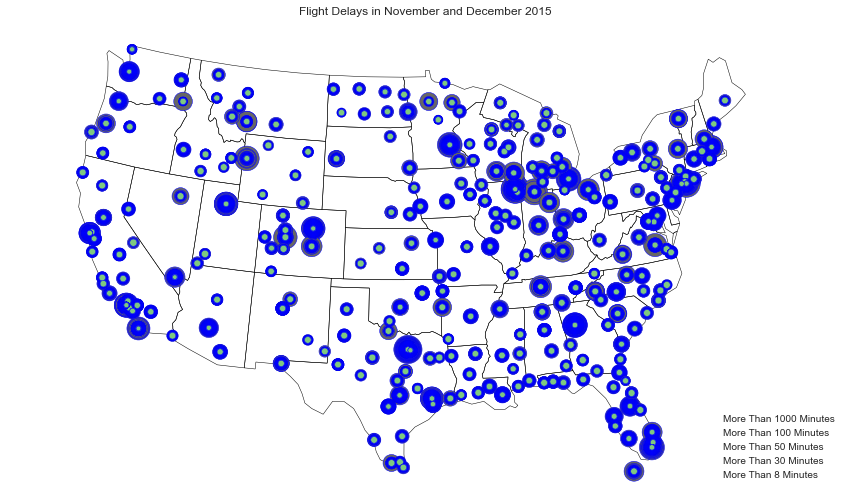

In [18]:
#make a map scaled on arrival delay
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)

ax = gplt.polyplot(contiguous_usa, 
                   projection=proj,
                   zorder=-1,  # Place the state shapes BELOW the cities.
                   linewidth=0.5,  # Make the state borders very thin.
                   figsize=(15, 15))  # enlarge image.

gplt.pointplot(arrivals, 
               scale="ARRIVAL_DELAY",  #Circle size varies by time delayed
               limits=(1, 40),  # specifies that largest delay is 40x size of smallest.
               hue = "ARRIVAL_IND", #hue by ARRIVAL_IND variable
               cmap = 'Accent',  # set color
               k=5,  # 5 classes of delay minutes
               linewidth=0.5,  # Circle borders are thin
               edgecolor='Blue',  #border is black
               legend=True,  #display legend
               legend_var='scale',  #based on defined scale above
               legend_values=[1000, 100, 50, 30, 8],
               legend_labels=['More Than 1000 Minutes', 'More Than 100 Minutes', 'More Than 50 Minutes',
                              'More Than 30 Minutes', 'More Than 8 Minutes'],  # 5 buckets of delays
               legend_kwargs={'frameon': False, 'loc': 'lower right'},  #lower right placement
               ax=ax, projection=proj)

ax.set_ylim((-1697757, 1457718)); pass

plt.title("Flight Delays in November and December 2015")  #Map title
plt.show()

## Lessons Learned -
One of the goals of exploratory data analysis is to ensure you have clean, well-formatted data appropriate to answer the question of interest.  Another goal of EDA is verify the data available is appropriate and sufficient to answer the question of interest. In this case, we have significant concerns about our ability to meet our original predictive goal. As we learned more about the dataset, we believe a related, more focused attempt to predict flight delays is a better fit for the data available. As in 'real life' evolution and change are to be expected and welcomed. We are evaluating predicting delays as both a continuous feature (in minutes) and categorical response (binary). In regards to classification, our class of interest (1 = delayed), we have a class imbalance that could be solved by oversampling the delays, bootstrapping, or undersampling the majority class (not delayed). All the EDA performed here allowed us to recognize some potential issues with our original approach and to look for additional business questions of interest which may be valuable given our stated goal.

Our next project will explore both approaches and we will determine then which would be the most beneficial. 